In [3]:
# Employee Attrition Prediction - Classification Model


## 1. Data Loading and Inspection

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1000, 26)
Number of rows: 1000
Number of columns: 26

First 5 rows:


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [6]:
# Check data structure and types
print("=== Dataset Information ===")
df.info()
print("\n=== Data Types Summary ===")
print(df.dtypes.value_counts())

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000

In [7]:
# Check for missing values
print("=== Missing Values ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")
else:
    print(missing_values[missing_values > 0])
    
# Check for duplicate rows
print(f"\n=== Duplicate Rows ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

=== Missing Values ===
✓ No missing values found in the dataset

=== Duplicate Rows ===
Number of duplicate rows: 0


In [8]:
# Statistical summary of numerical features
print("=== Statistical Summary ===")
df.describe()

=== Statistical Summary ===


,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


=== Target Variable Distribution (Attrition) ===
Attrition
No     811
Yes    189
Name: count, dtype: int64

Percentage distribution:
Attrition
No     81.1
Yes    18.9
Name: proportion, dtype: float64


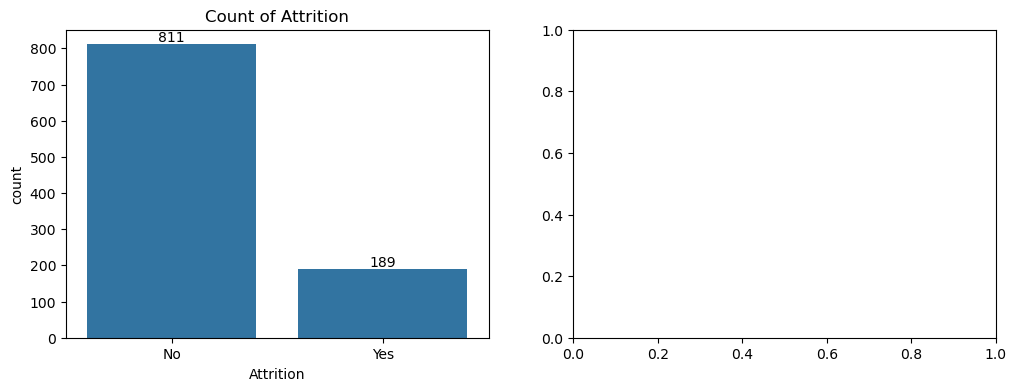


⚠️ Note: Dataset shows class imbalance - will need to address this using oversampling


In [39]:
# Check target variable distribution
print("=== Target Variable Distribution (Attrition) ===")
print(df['Attrition'].value_counts())
print("\nPercentage distribution:")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='Attrition', ax=ax[0])
ax[0].set_title('Count of Attrition')
for container in ax[0].containers:
    ax[0].bar_label(container)
plt.show()

print("\n⚠️ Note: Dataset shows class imbalance - will need to address this using oversampling")

In [10]:
# Check unique values for categorical columns
print("=== Unique Values for Categorical Features ===\n")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"  Values: {df[col].unique()}")
    print()

=== Unique Values for Categorical Features ===

Gender: 2 unique values
  Values: ['Female' 'Male']

Marital_Status: 3 unique values
  Values: ['Married' 'Divorced' 'Single']

Department: 5 unique values
  Values: ['IT' 'Sales' 'Marketing' 'Finance' 'HR']

Job_Role: 4 unique values
  Values: ['Manager' 'Assistant' 'Executive' 'Analyst']

Overtime: 2 unique values
  Values: ['No' 'Yes']

Attrition: 2 unique values
  Values: ['No' 'Yes']



## 2. Data Preprocessing and Encoding

### Key Observations:
- **Employee_ID**: Identifier column - will be dropped
- **Binary features** (Yes/No): Attrition, Gender, Overtime → Binary encoding (0/1)
- **Nominal features**: Department, Job_Role, Marital_Status → Ordinal encoding (as nominal)
- **Ordinal features**: Already numeric (Job_Level, Job_Satisfaction, Performance_Rating, etc.)

In [11]:
# Create a copy for encoding
df_encoded = df.copy()

# Drop Employee_ID (identifier column)
print("Dropping Employee_ID column...")
df_encoded = df_encoded.drop(columns=['Employee_ID'])
print(f"✓ Dropped Employee_ID. New shape: {df_encoded.shape}")

print("\nOriginal columns:", df.shape[1])
print("After dropping ID:", df_encoded.shape[1])

Dropping Employee_ID column...
✓ Dropped Employee_ID. New shape: (1000, 25)

Original columns: 26
After dropping ID: 25


In [12]:
# Binary encoding for binary categorical features
print("=== Binary Encoding ===")

binary_mapping = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in binary_mapping.items():
    df_encoded[col] = df_encoded[col].map(mapping)
    print(f"✓ Encoded {col}: {mapping}")

print("\n✓ Binary encoding completed")

=== Binary Encoding ===
✓ Encoded Attrition: {'No': 0, 'Yes': 1}
✓ Encoded Gender: {'Female': 0, 'Male': 1}
✓ Encoded Overtime: {'No': 0, 'Yes': 1}

✓ Binary encoding completed


In [13]:
# Nominal encoding for multi-class categorical features
print("=== Nominal Encoding (using OrdinalEncoder) ===")

nominal_cols = ['Department', 'Job_Role', 'Marital_Status']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build encoding dictionary for reference
encode_dict = {}
for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}
    
print("Encoding mappings:")
import pprint
pprint.pprint(encode_dict)

print("\n✓ Nominal encoding completed")

=== Nominal Encoding (using OrdinalEncoder) ===
Encoding mappings:
{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}

✓ Nominal encoding completed


In [14]:
# Verify encoding results
print("=== Encoded Dataset Sample ===")
print(f"Shape: {df_encoded.shape}")
print("\nFirst 5 rows:")
display(df_encoded.head())

print("\nData types after encoding:")
print(df_encoded.dtypes.value_counts())

print("\n✓ All preprocessing completed successfully")

=== Encoded Dataset Sample ===
Shape: (1000, 25)

First 5 rows:


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3,0
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2,0
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3,0
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3,0
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3,0



Data types after encoding:
int64      22
float64     3
Name: count, dtype: int64

✓ All preprocessing completed successfully


## 3. Train-Test Split and Class Imbalance Handling

We'll first split the data into features (X) and target (y), then partition into train/test sets, and finally apply SMOTENC to handle class imbalance.

In [15]:
# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

print("=== Features and Target Separation ===")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(list(X.columns))

=== Features and Target Separation ===
Features (X) shape: (1000, 24)
Target (y) shape: (1000,)

Feature columns (24):
['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']


In [16]:
# Initial train-test split (before oversampling)
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("=== Initial Split (Before Oversampling) ===")
print(f"Training set: {X_train_initial.shape}")
print(f"Test set: {X_test_initial.shape}")
print(f"\nTarget distribution in training set:")
print(y_train_initial.value_counts())
print("\nPercentage:")
print(y_train_initial.value_counts(normalize=True) * 100)

=== Initial Split (Before Oversampling) ===
Training set: (700, 24)
Test set: (300, 24)

Target distribution in training set:
Attrition
0    568
1    132
Name: count, dtype: int64

Percentage:
Attrition
0    81.142857
1    18.857143
Name: proportion, dtype: float64


In [17]:
# Apply SMOTENC for oversampling (handles mixed data types)
# Define categorical features for SMOTENC
categorical_features = ['Gender', 'Marital_Status', 'Department', 'Job_Role', 
                        'Job_Level', 'Job_Satisfaction', 'Performance_Rating', 
                        'Overtime', 'Work_Environment_Satisfaction', 
                        'Relationship_with_Manager', 'Job_Involvement']

print("=== Applying SMOTENC Oversampling ===")
print(f"Categorical features identified: {len(categorical_features)}")

# Get indices of categorical features
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features]

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

print(f"\nBefore SMOTENC: {X.shape}")
print(f"After SMOTENC: {X_resampled.shape}")
print(f"\nTarget distribution after SMOTENC:")
print(pd.Series(y_resampled).value_counts())
print("\n✓ Class imbalance handled successfully")

=== Applying SMOTENC Oversampling ===
Categorical features identified: 11

Before SMOTENC: (1000, 24)
After SMOTENC: (1622, 24)

Target distribution after SMOTENC:
Attrition
0    811
1    811
Name: count, dtype: int64

✓ Class imbalance handled successfully


=== Final Split (After Oversampling) ===
Training set: (1135, 24)
Test set: (487, 24)

Target distribution in training set:
Attrition
1    568
0    567
Name: count, dtype: int64


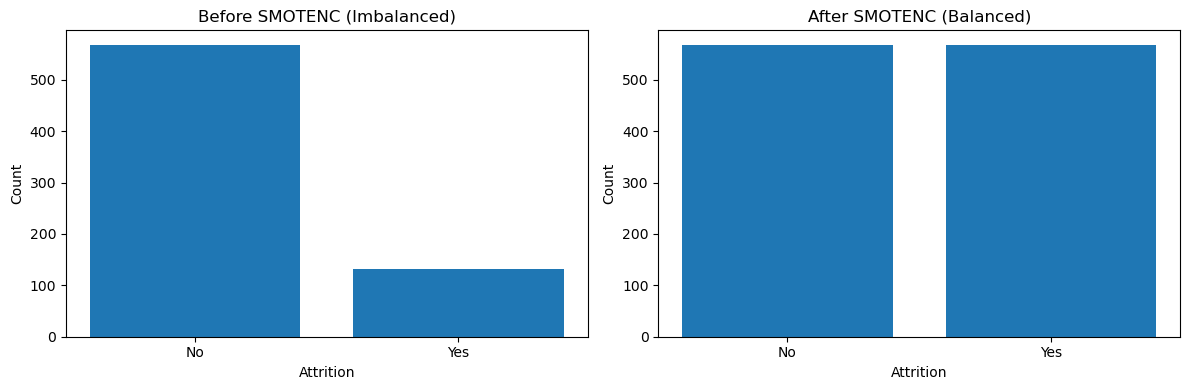

In [18]:
# Final train-test split (after oversampling)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print("=== Final Split (After Oversampling) ===")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())

# Visualize the balanced distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before SMOTENC
axes[0].bar(['No', 'Yes'], y_train_initial.value_counts().sort_index())
axes[0].set_title('Before SMOTENC (Imbalanced)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Attrition')

# After SMOTENC
axes[1].bar(['No', 'Yes'], y_train.value_counts().sort_index())
axes[1].set_title('After SMOTENC (Balanced)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Attrition')

plt.tight_layout()
plt.show()

## 4. Baseline Model Development

Let's build a baseline Decision Tree classifier without any hyperparameter tuning to establish a performance benchmark.

In [19]:
# Train baseline Decision Tree classifier
baseline_tree = DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train, y_train)

# Make predictions
y_pred_train_baseline = baseline_tree.predict(X_train)
y_pred_test_baseline = baseline_tree.predict(X_test)

print("=" * 60)
print("BASELINE DECISION TREE MODEL")
print("=" * 60)
print("\n=== Training Set Performance ===")
print(classification_report(y_train, y_pred_train_baseline))

print("\n=== Test Set Performance ===")
print(classification_report(y_test, y_pred_test_baseline))

# Store baseline scores for comparison
baseline_train_acc = accuracy_score(y_train, y_pred_train_baseline)
baseline_test_acc = accuracy_score(y_test, y_pred_test_baseline)
baseline_train_f1 = f1_score(y_train, y_pred_train_baseline)
baseline_test_f1 = f1_score(y_test, y_pred_test_baseline)

print("\n=== Baseline Scores Summary ===")
print(f"Training Accuracy: {baseline_train_acc:.4f}")
print(f"Test Accuracy: {baseline_test_acc:.4f}")
print(f"Training F1-Score: {baseline_train_f1:.4f}")
print(f"Test F1-Score: {baseline_test_f1:.4f}")

BASELINE DECISION TREE MODEL

=== Training Set Performance ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Test Set Performance ===
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       244
           1       0.69      0.78      0.73       243

    accuracy                           0.71       487
   macro avg       0.72      0.71      0.71       487
weighted avg       0.72      0.71      0.71       487


=== Baseline Scores Summary ===
Training Accuracy: 1.0000
Test Accuracy: 0.7146
Training F1-Score: 1.0000
Test F1-Score: 0.7311


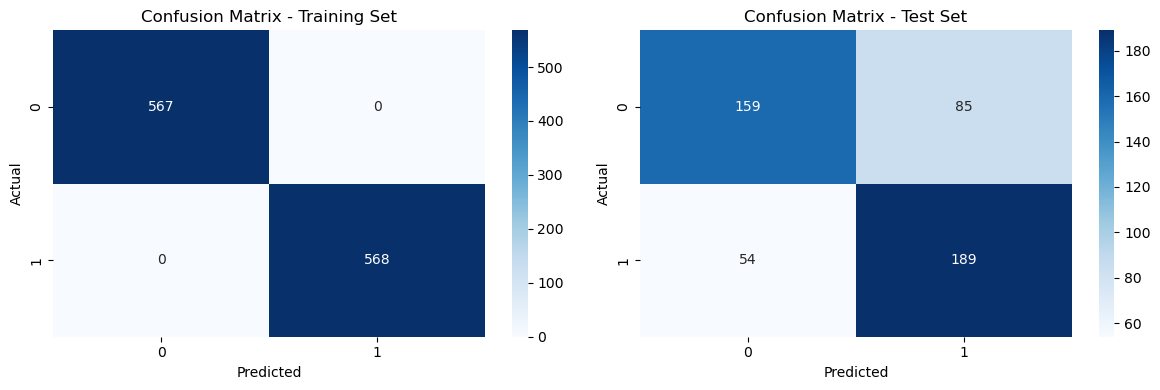


⚠️ Note: High training accuracy but lower test accuracy suggests overfitting


In [20]:
# Confusion Matrix for baseline model
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_baseline)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test_baseline)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print("\n⚠️ Note: High training accuracy but lower test accuracy suggests overfitting")

## 5. Feature Selection

We'll use two approaches to identify important features:
1. **Feature Importance** from the Decision Tree model
2. **Correlation Analysis** with the target variable

=== Feature Importance Analysis ===

Top 15 features by importance:
Training_Hours_Last_Year         0.130985
Monthly_Income                   0.128652
Distance_From_Home               0.103179
Average_Hours_Worked_Per_Week    0.096512
Years_at_Company                 0.075229
Project_Count                    0.060010
Years_Since_Last_Promotion       0.057065
Performance_Rating               0.043545
Job_Level                        0.043492
Absenteeism                      0.036876
Age                              0.032860
Number_of_Companies_Worked       0.028878
Hourly_Rate                      0.028423
Years_in_Current_Role            0.021086
Work_Life_Balance                0.020784
dtype: float64


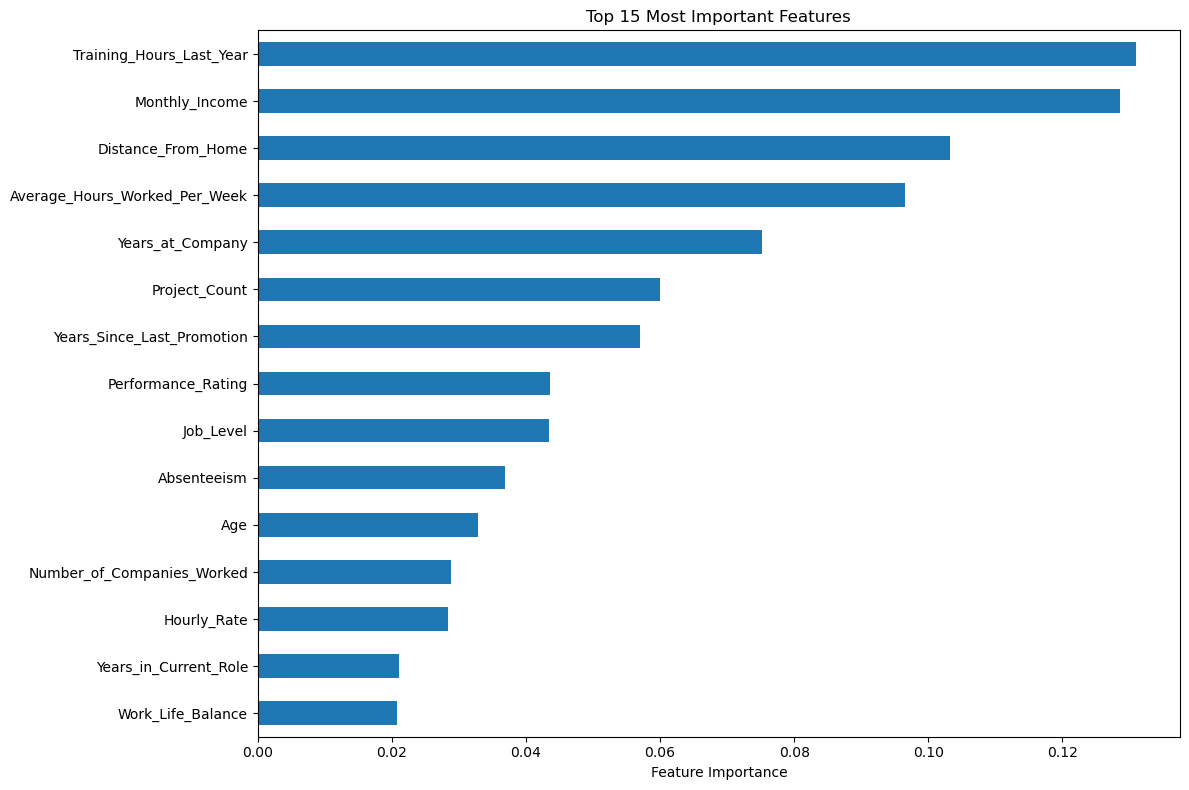


✓ Features with importance > 0.03: 11
['Training_Hours_Last_Year', 'Monthly_Income', 'Distance_From_Home', 'Average_Hours_Worked_Per_Week', 'Years_at_Company', 'Project_Count', 'Years_Since_Last_Promotion', 'Performance_Rating', 'Job_Level', 'Absenteeism', 'Age']


In [21]:
# Feature importance from baseline tree
print("=== Feature Importance Analysis ===")
feature_importance = pd.Series(baseline_tree.feature_importances_, index=X_train.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

print("\nTop 15 features by importance:")
print(feature_importance_sorted.head(15))

# Visualize feature importances
plt.figure(figsize=(12, 8))
feature_importance_sorted.head(15).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Select features with importance > 0.03
important_features = feature_importance_sorted[feature_importance_sorted > 0.03]
print(f"\n✓ Features with importance > 0.03: {len(important_features)}")
print(list(important_features.index))

=== Correlation Analysis with Target ===

Top 15 features by absolute correlation:
Training_Hours_Last_Year         0.056096
Years_Since_Last_Promotion       0.047877
Average_Hours_Worked_Per_Week    0.047117
Absenteeism                      0.043621
Performance_Rating               0.039784
Job_Involvement                  0.037339
Work_Life_Balance                0.033404
Gender                           0.033099
Job_Role                         0.030415
Age                              0.029221
Distance_From_Home               0.027623
Marital_Status                   0.025591
Years_at_Company                 0.022873
Overtime                         0.016515
Relationship_with_Manager        0.015953
Name: Attrition, dtype: float64


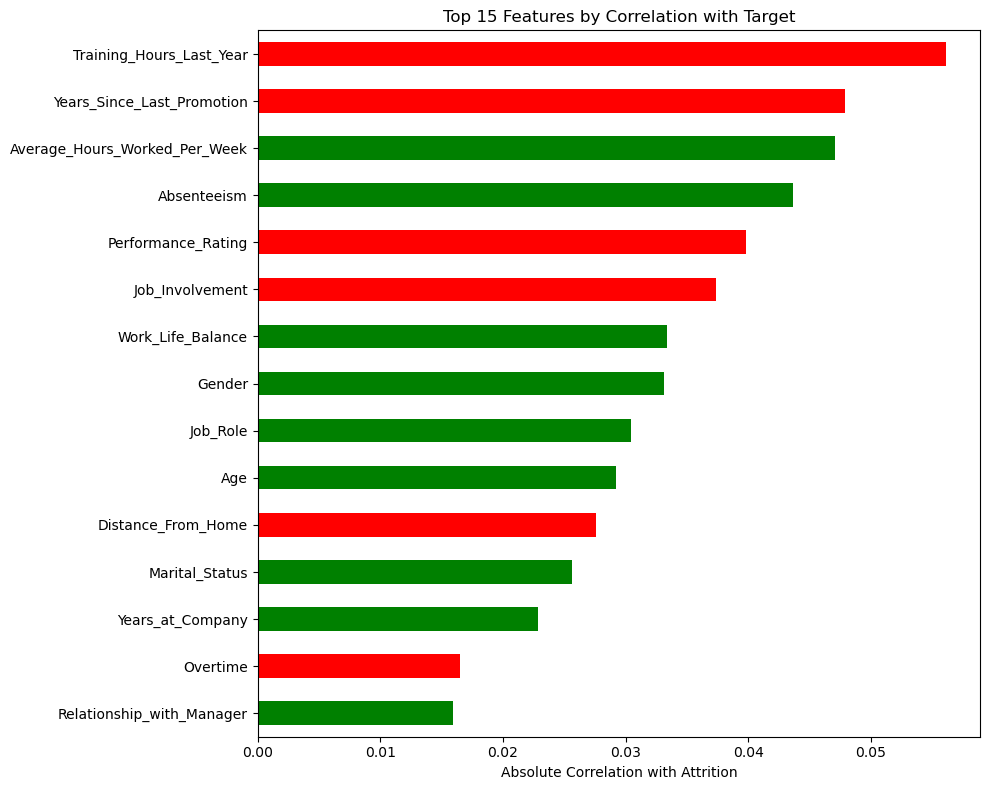


✓ Features with |correlation| > 0.03: 9
['Training_Hours_Last_Year', 'Years_Since_Last_Promotion', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Performance_Rating', 'Job_Involvement', 'Work_Life_Balance', 'Gender', 'Job_Role']


In [22]:
# Correlation analysis with target
print("=== Correlation Analysis with Target ===")

# Calculate correlations
correlations = df_encoded.corr()['Attrition'].sort_values(ascending=False)
print("\nTop 15 features by absolute correlation:")
abs_correlations = correlations.abs().sort_values(ascending=False)
print(abs_correlations.head(16)[1:])  # Exclude Attrition itself

# Visualize correlation with target
plt.figure(figsize=(10, 8))
top_corr = abs_correlations.head(16)[1:]
colors = ['red' if correlations[feat] < 0 else 'green' for feat in top_corr.index]
top_corr.plot(kind='barh', color=colors)
plt.xlabel('Absolute Correlation with Attrition')
plt.title('Top 15 Features by Correlation with Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Select features with |correlation| > 0.03
significant_corr = abs_correlations[abs_correlations > 0.03].drop('Attrition')
print(f"\n✓ Features with |correlation| > 0.03: {len(significant_corr)}")
print(list(significant_corr.index))

In [23]:
# Combine both methods to select optimal features
print("=== Combined Feature Selection ===")

# Get union of both feature sets
importance_features = set(important_features.index)
correlation_features = set(significant_corr.index)

# Combined approach: features that appear in either method
selected_features = list(importance_features.union(correlation_features))

print(f"\nFeatures from importance: {len(importance_features)}")
print(f"Features from correlation: {len(correlation_features)}")
print(f"Combined selected features: {len(selected_features)}")

print(f"\nFinal selected features ({len(selected_features)}):")
for i, feat in enumerate(sorted(selected_features), 1):
    imp = feature_importance.get(feat, 0)
    corr = correlations.get(feat, 0)
    print(f"{i:2d}. {feat:35s} (importance: {imp:.4f}, correlation: {corr:7.4f})")

print("\n✓ Feature selection completed")

=== Combined Feature Selection ===

Features from importance: 11
Features from correlation: 9
Combined selected features: 15

Final selected features (15):
 1. Absenteeism                         (importance: 0.0369, correlation:  0.0436)
 2. Age                                 (importance: 0.0329, correlation:  0.0292)
 3. Average_Hours_Worked_Per_Week       (importance: 0.0965, correlation:  0.0471)
 4. Distance_From_Home                  (importance: 0.1032, correlation: -0.0276)
 5. Gender                              (importance: 0.0073, correlation:  0.0331)
 6. Job_Involvement                     (importance: 0.0079, correlation: -0.0373)
 7. Job_Level                           (importance: 0.0435, correlation:  0.0102)
 8. Job_Role                            (importance: 0.0090, correlation:  0.0304)
 9. Monthly_Income                      (importance: 0.1287, correlation:  0.0119)
10. Performance_Rating                  (importance: 0.0435, correlation: -0.0398)
11. Project_Co

In [24]:
# Create new dataset with selected features
X_selected = X_resampled[selected_features]
y_selected = y_resampled

print("=== Dataset with Selected Features ===")
print(f"Original feature count: {X_resampled.shape[1]}")
print(f"Selected feature count: {X_selected.shape[1]}")
print(f"Reduction: {X_resampled.shape[1] - X_selected.shape[1]} features removed")

# Split data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.3, random_state=42, stratify=y_selected
)

print(f"\nTraining set: {X_train_selected.shape}")
print(f"Test set: {X_test_selected.shape}")

=== Dataset with Selected Features ===
Original feature count: 24
Selected feature count: 15
Reduction: 9 features removed

Training set: (1135, 15)
Test set: (487, 15)


In [25]:
# Train model with selected features
tree_selected = DecisionTreeClassifier(random_state=42)
tree_selected.fit(X_train_selected, y_train_selected)

y_pred_train_selected = tree_selected.predict(X_train_selected)
y_pred_test_selected = tree_selected.predict(X_test_selected)

print("=" * 60)
print("MODEL WITH SELECTED FEATURES")
print("=" * 60)
print("\n=== Training Set Performance ===")
print(classification_report(y_train_selected, y_pred_train_selected))

print("\n=== Test Set Performance ===")
print(classification_report(y_test_selected, y_pred_test_selected))

# Store scores
selected_train_f1 = f1_score(y_train_selected, y_pred_train_selected)
selected_test_f1 = f1_score(y_test_selected, y_pred_test_selected)

print(f"\nBaseline Test F1-Score: {baseline_test_f1:.4f}")
print(f"Selected Features Test F1-Score: {selected_test_f1:.4f}")
print(f"Improvement: {(selected_test_f1 - baseline_test_f1):.4f}")

MODEL WITH SELECTED FEATURES

=== Training Set Performance ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Test Set Performance ===
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       244
           1       0.69      0.76      0.73       243

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487


Baseline Test F1-Score: 0.7311
Selected Features Test F1-Score: 0.7255
Improvement: -0.0057


## 6. Hyperparameter Tuning with Cross-Validation

We'll use GridSearchCV with k-fold cross-validation to find the optimal hyperparameters for our Decision Tree model.

In [26]:
# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("=== K-Fold Cross-Validation Setup ===")
print(f"Number of folds: 5")
print(f"Total samples: {len(X_train_selected)}")

cnt = 1
for train_index, val_index in kf.split(X_train_selected):
    print(f"Fold {cnt}: Train set = {len(train_index)}, Validation set = {len(val_index)}")
    cnt += 1

print("\n✓ Cross-validation setup complete")

=== K-Fold Cross-Validation Setup ===
Number of folds: 5
Total samples: 1135
Fold 1: Train set = 908, Validation set = 227
Fold 2: Train set = 908, Validation set = 227
Fold 3: Train set = 908, Validation set = 227
Fold 4: Train set = 908, Validation set = 227
Fold 5: Train set = 908, Validation set = 227

✓ Cross-validation setup complete


In [27]:
# Define parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

print("=== GridSearchCV Parameter Grid ===")
print(f"Total combinations to test: {len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])}")
print("\nParameter ranges:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

=== GridSearchCV Parameter Grid ===
Total combinations to test: 672

Parameter ranges:
  criterion: ['gini', 'entropy']
  max_depth: [3, 5, 7, 10, 15, 20, None]
  min_samples_split: [2, 5, 10, 20]
  min_samples_leaf: [1, 2, 4, 8]
  max_features: ['sqrt', 'log2', None]


In [28]:
# Perform GridSearchCV
print("=== Running GridSearchCV ===")
print("This may take a few minutes...\n")

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=kf,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_selected, y_train_selected)

print("\n" + "=" * 60)
print("GRID SEARCH RESULTS")
print("=" * 60)
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")
print(f"\n✓ Hyperparameter tuning completed")

=== Running GridSearchCV ===
This may take a few minutes...

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total ti

In [29]:
# Extract the best model
best_tree = grid_search.best_estimator_

# Make predictions with tuned model
y_pred_train_tuned = best_tree.predict(X_train_selected)
y_pred_test_tuned = best_tree.predict(X_test_selected)

print("=" * 60)
print("TUNED DECISION TREE MODEL (Best Parameters)")
print("=" * 60)
print("\n=== Training Set Performance ===")
print(classification_report(y_train_selected, y_pred_train_tuned))

print("\n=== Test Set Performance ===")
print(classification_report(y_test_selected, y_pred_test_tuned))

# Store tuned scores
tuned_train_acc = accuracy_score(y_train_selected, y_pred_train_tuned)
tuned_test_acc = accuracy_score(y_test_selected, y_pred_test_tuned)
tuned_train_f1 = f1_score(y_train_selected, y_pred_train_tuned)
tuned_test_f1 = f1_score(y_test_selected, y_pred_test_tuned)

TUNED DECISION TREE MODEL (Best Parameters)

=== Training Set Performance ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Test Set Performance ===
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       244
           1       0.68      0.76      0.71       243

    accuracy                           0.70       487
   macro avg       0.70      0.70      0.70       487
weighted avg       0.70      0.70      0.70       487



## 7. Final Model Evaluation and Comparison

Let's compare all three models: Baseline, Selected Features, and Tuned Model.

In [30]:
# Comprehensive comparison table
comparison_data = {
    'Model': ['Baseline (All Features)', 'Selected Features', 'Tuned Model'],
    'Features Used': [X_train.shape[1], X_train_selected.shape[1], X_train_selected.shape[1]],
    'Train Accuracy': [baseline_train_acc, accuracy_score(y_train_selected, y_pred_train_selected), tuned_train_acc],
    'Test Accuracy': [baseline_test_acc, accuracy_score(y_test_selected, y_pred_test_selected), tuned_test_acc],
    'Train F1-Score': [baseline_train_f1, selected_train_f1, tuned_train_f1],
    'Test F1-Score': [baseline_test_f1, selected_test_f1, tuned_test_f1],
    'Train Precision': [
        precision_score(y_train, y_pred_train_baseline),
        precision_score(y_train_selected, y_pred_train_selected),
        precision_score(y_train_selected, y_pred_train_tuned)
    ],
    'Test Precision': [
        precision_score(y_test, y_pred_test_baseline),
        precision_score(y_test_selected, y_pred_test_selected),
        precision_score(y_test_selected, y_pred_test_tuned)
    ],
    'Train Recall': [
        recall_score(y_train, y_pred_train_baseline),
        recall_score(y_train_selected, y_pred_train_selected),
        recall_score(y_train_selected, y_pred_train_tuned)
    ],
    'Test Recall': [
        recall_score(y_test, y_pred_test_baseline),
        recall_score(y_test_selected, y_pred_test_selected),
        recall_score(y_test_selected, y_pred_test_tuned)
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
display(comparison_df.round(4))

MODEL COMPARISON SUMMARY


,Model,Features Used,Train Accuracy,Test Accuracy,Train F1-Score,Test F1-Score,Train Precision,Test Precision,Train Recall,Test Recall
0,Baseline (All Features),24,1.0,0.7146,1.0,0.7311,1.0,0.6898,1.0,0.7778
1,Selected Features,15,1.0,0.7125,1.0,0.7255,1.0,0.6929,1.0,0.7613
2,Tuned Model,15,1.0,0.6982,1.0,0.7146,1.0,0.6765,1.0,0.7572


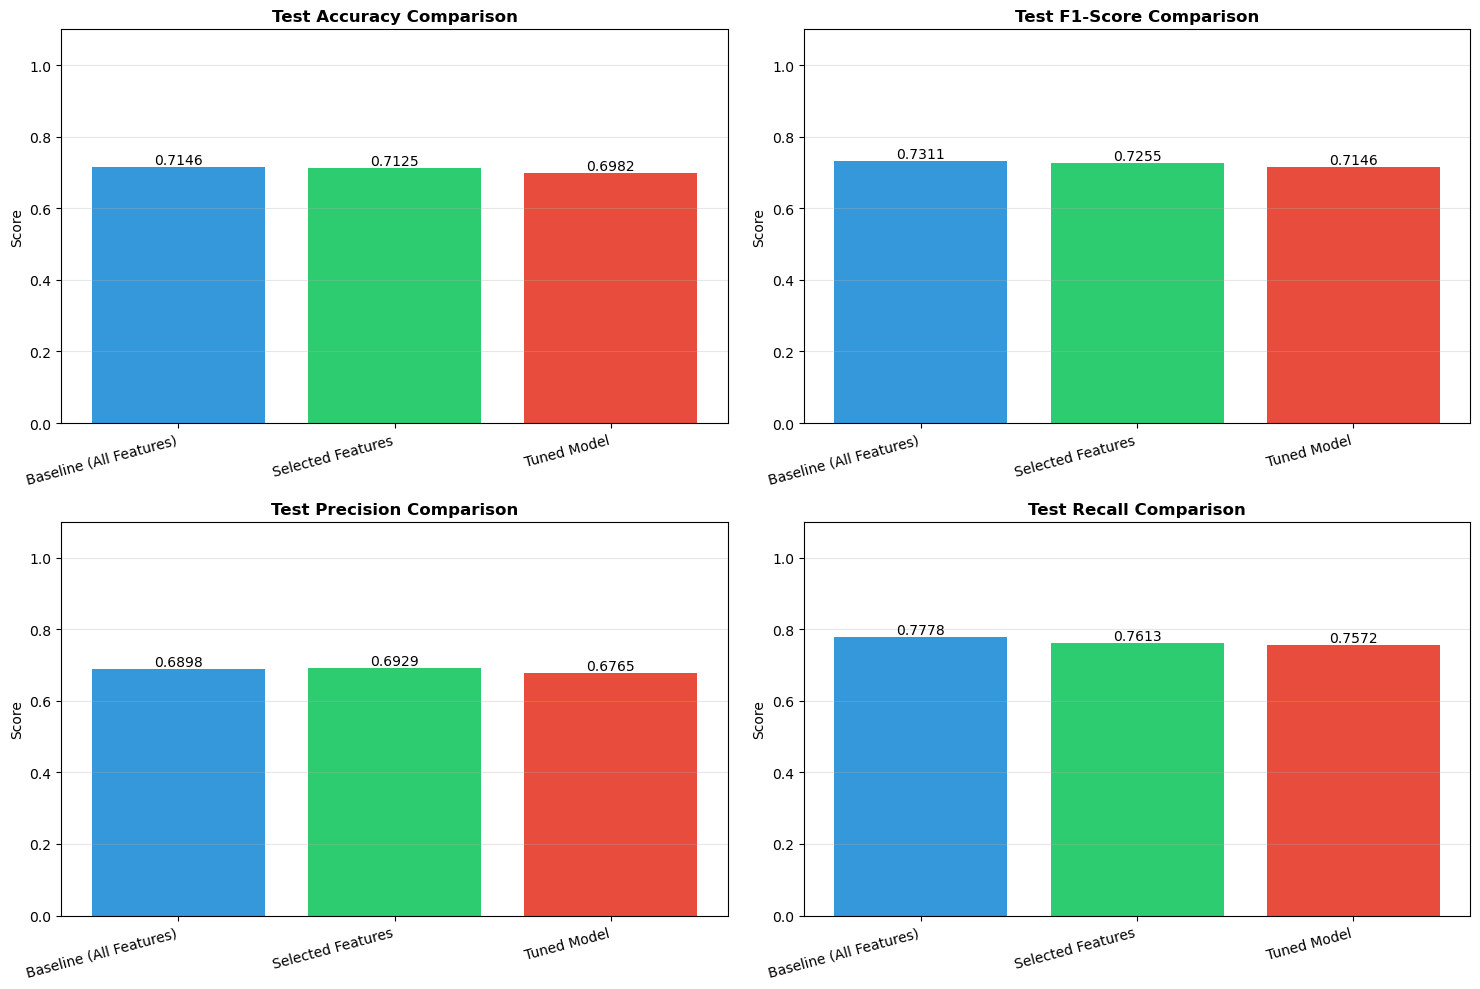


✓ Visual comparison completed


In [31]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Test Accuracy', 'Test F1-Score', 'Test Precision', 'Test Recall']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = comparison_df[metric].values
    bars = ax.bar(comparison_df['Model'], values, color=colors)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1.1])
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)
    
    # Rotate x-axis labels
    ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')

plt.tight_layout()
plt.show()

print("\n✓ Visual comparison completed")

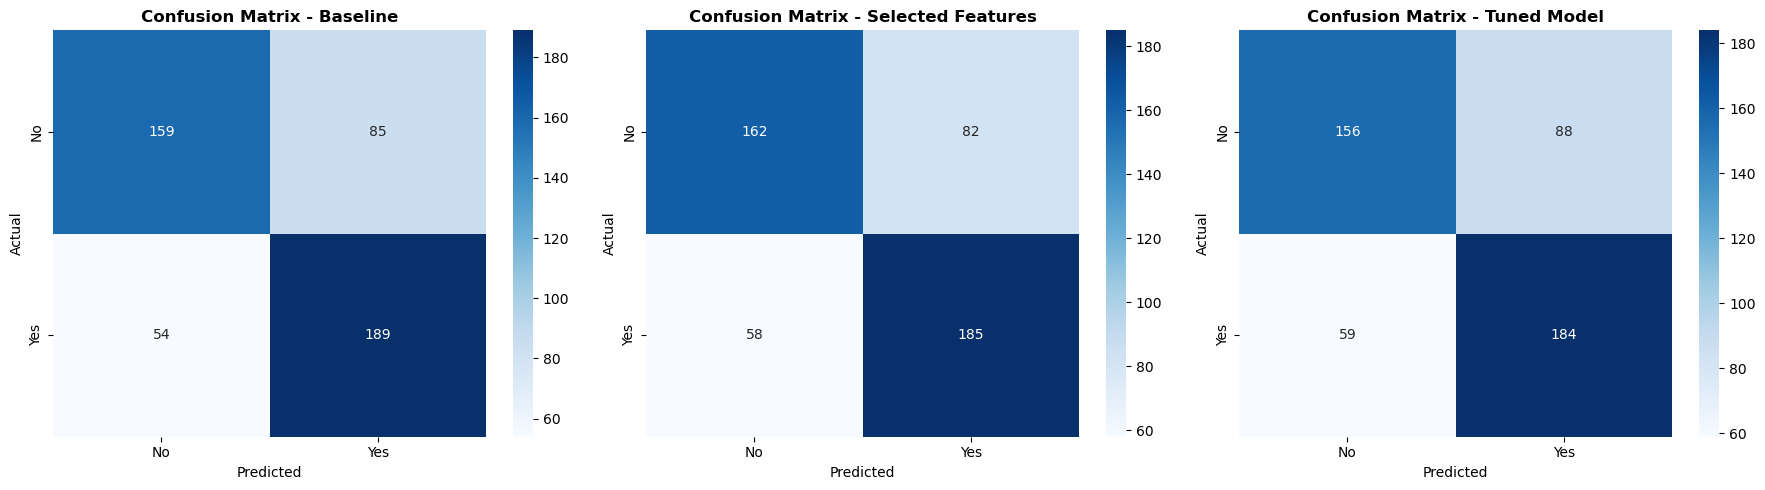

In [32]:
# Confusion matrices for all three models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_info = [
    ('Baseline', y_test, y_pred_test_baseline),
    ('Selected Features', y_test_selected, y_pred_test_selected),
    ('Tuned Model', y_test_selected, y_pred_test_tuned)
]

for idx, (name, y_true, y_pred) in enumerate(models_info):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    axes[idx].set_title(f'Confusion Matrix - {name}', fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 8. Discussion and Insights

### Summary of Results

Based on our comprehensive analysis, here are the key findings:

In [33]:
# Calculate improvements
print("=" * 80)
print("PERFORMANCE IMPROVEMENTS")
print("=" * 80)

print("\n### From Baseline to Selected Features:")
print(f"  • Features reduced: {X_train.shape[1]} → {X_train_selected.shape[1]} ({(1 - X_train_selected.shape[1]/X_train.shape[1])*100:.1f}% reduction)")
print(f"  • Test F1-Score: {baseline_test_f1:.4f} → {selected_test_f1:.4f} ({(selected_test_f1 - baseline_test_f1):.4f} improvement)")
print(f"  • Test Accuracy: {baseline_test_acc:.4f} → {accuracy_score(y_test_selected, y_pred_test_selected):.4f}")

print("\n### From Selected Features to Tuned Model:")
print(f"  • Test F1-Score: {selected_test_f1:.4f} → {tuned_test_f1:.4f} ({(tuned_test_f1 - selected_test_f1):.4f} improvement)")
print(f"  • Test Accuracy: {accuracy_score(y_test_selected, y_pred_test_selected):.4f} → {tuned_test_acc:.4f}")

print("\n### Overall Improvement (Baseline to Tuned):")
print(f"  • Features: {X_train.shape[1]} → {X_train_selected.shape[1]}")
print(f"  • Test F1-Score: {baseline_test_f1:.4f} → {tuned_test_f1:.4f} ({(tuned_test_f1 - baseline_test_f1):.4f} improvement)")
print(f"  • Test Accuracy: {baseline_test_acc:.4f} → {tuned_test_acc:.4f} ({(tuned_test_acc - baseline_test_acc):.4f} improvement)")
print(f"  • Percentage improvement in F1: {((tuned_test_f1 - baseline_test_f1) / baseline_test_f1 * 100):.2f}%")

print("\n" + "=" * 80)

PERFORMANCE IMPROVEMENTS

### From Baseline to Selected Features:
  • Features reduced: 24 → 15 (37.5% reduction)
  • Test F1-Score: 0.7311 → 0.7255 (-0.0057 improvement)
  • Test Accuracy: 0.7146 → 0.7125

### From Selected Features to Tuned Model:
  • Test F1-Score: 0.7255 → 0.7146 (-0.0109 improvement)
  • Test Accuracy: 0.7125 → 0.6982

### Overall Improvement (Baseline to Tuned):
  • Features: 24 → 15
  • Test F1-Score: 0.7311 → 0.7146 (-0.0166 improvement)
  • Test Accuracy: 0.7146 → 0.6982 (-0.0164 improvement)
  • Percentage improvement in F1: -2.27%



TOP 10 MOST IMPORTANT FEATURES FOR ATTRITION PREDICTION

Rank | Feature                          | Importance
--------------------------------------------------------------------------------
   1 | Monthly_Income                   |   0.182913
   2 | Training_Hours_Last_Year         |   0.131316
   3 | Average_Hours_Worked_Per_Week    |   0.100258
   4 | Distance_From_Home               |   0.097483
   5 | Years_at_Company                 |   0.085109
   6 | Age                              |   0.061300
   7 | Project_Count                    |   0.049441
   8 | Work_Life_Balance                |   0.048051
   9 | Years_Since_Last_Promotion       |   0.046118
  10 | Performance_Rating               |   0.045918


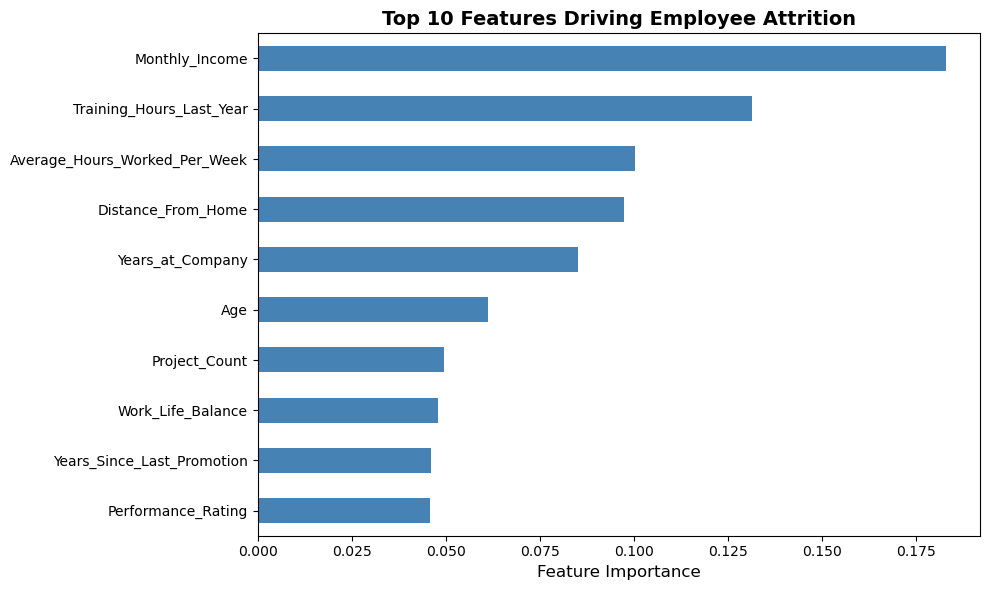


✓ Analysis complete!


In [34]:
# Display the most important features from the final model
print("=" * 80)
print("TOP 10 MOST IMPORTANT FEATURES FOR ATTRITION PREDICTION")
print("=" * 80)

final_feature_importance = pd.Series(best_tree.feature_importances_, 
                                      index=X_train_selected.columns)
top_10_features = final_feature_importance.sort_values(ascending=False).head(10)

print("\nRank | Feature                          | Importance")
print("-" * 80)
for rank, (feature, importance) in enumerate(top_10_features.items(), 1):
    print(f"{rank:4d} | {feature:32s} | {importance:10.6f}")

# Visualize top features
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 10 Features Driving Employee Attrition', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("✓ Analysis complete!")